In [ ]:
from google.colab import files


uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("winequality-white.csv", sep=";")

data['target'] = (data['quality'] >= 7).astype(int)
X = data.drop(['quality', 'target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Baseline Model (no regularization):
Train Accuracy: 0.8058
Test Accuracy: 0.7847

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       753
           1       0.58      0.26      0.36       227

    accuracy                           0.78       980
   macro avg       0.69      0.60      0.61       980
weighted avg       0.76      0.78      0.75       980



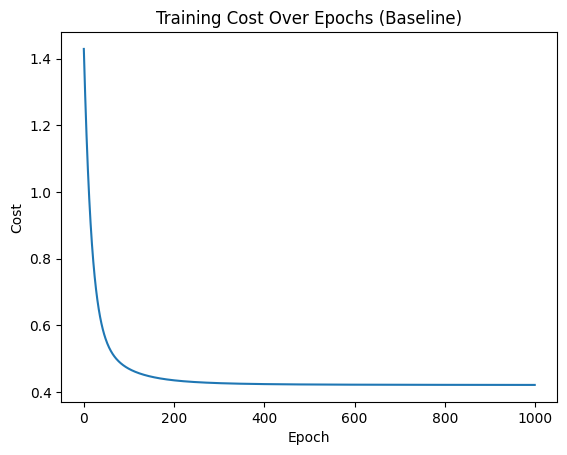

In [ ]:
lr_baseline = LogisticRegression(learning_rate=0.1, regularization_term=0, epochs=1000)
lr_baseline.fit(X_train_scaled, y_train)

train_preds = lr_baseline.predict(X_train_scaled)
test_preds = lr_baseline.predict(X_test_scaled)

print("Baseline Model (no regularization):")
print(f"Train Accuracy: {accuracy_score(y_train, train_preds):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, test_preds))

plt.plot(lr_baseline.cost)
plt.title("Training Cost Over Epochs (Baseline)")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()


Degree 1:
Train Accuracy: 0.7476
Test Accuracy: 0.7337

Degree 2:
Train Accuracy: 0.7555
Test Accuracy: 0.7500

Degree 3:
Train Accuracy: 0.7527
Test Accuracy: 0.7204

Degree 4:
Train Accuracy: 0.7560
Test Accuracy: 0.7490

Degree 5:
Train Accuracy: 0.7734
Test Accuracy: 0.7500


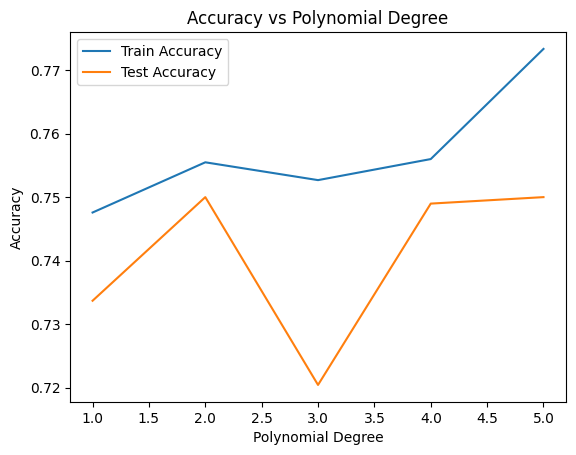

In [ ]:
def create_poly_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

degrees = [1, 2, 3, 4, 5]
train_accs = []
test_accs = []

for degree in degrees:
    X_train_poly = create_poly_features(X_train_scaled, degree)
    X_test_poly = create_poly_features(X_test_scaled, degree)

    lr_poly = LogisticRegression(learning_rate=0.01, regularization_term=0, epochs=1000)
    lr_poly.fit(X_train_poly, y_train)

    train_preds = lr_poly.predict(X_train_poly)
    test_preds = lr_poly.predict(X_test_poly)

    train_accs.append(accuracy_score(y_train, train_preds))
    test_accs.append(accuracy_score(y_test, test_preds))

    print(f"\nDegree {degree}:")
    print(f"Train Accuracy: {train_accs[-1]:.4f}")
    print(f"Test Accuracy: {test_accs[-1]:.4f}")

plt.plot(degrees, train_accs, label='Train Accuracy')
plt.plot(degrees, test_accs, label='Test Accuracy')
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Polynomial Degree")
plt.show()


Regularization term 0:
Train Accuracy: 0.7402
Test Accuracy: 0.7173

Regularization term 0.1:
Train Accuracy: 0.7591
Test Accuracy: 0.7418

Regularization term 1:
Train Accuracy: 0.7514
Test Accuracy: 0.7092

Regularization term 10:
Train Accuracy: 0.7297
Test Accuracy: 0.7357

Regularization term 100:
Train Accuracy: 0.7606
Test Accuracy: 0.7469


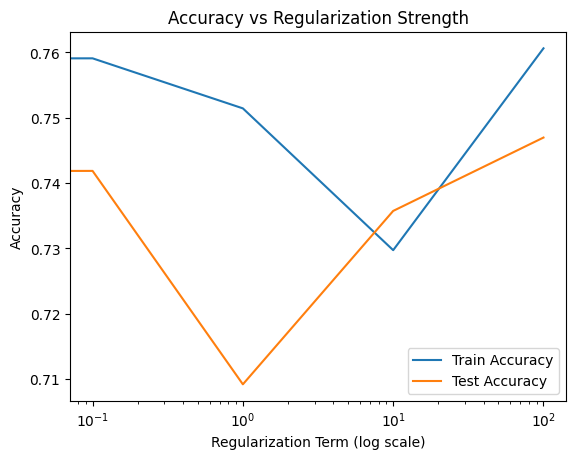

In [ ]:
overfit_degree = 3
X_train_poly = create_poly_features(X_train_scaled, overfit_degree)
X_test_poly = create_poly_features(X_test_scaled, overfit_degree)

reg_terms = [0, 0.1, 1, 10, 100]
train_accs_reg = []
test_accs_reg = []

for reg_term in reg_terms:
    lr_reg = LogisticRegression(learning_rate=0.01, regularization_term=reg_term, epochs=1000)
    lr_reg.fit(X_train_poly, y_train)

    train_preds = lr_reg.predict(X_train_poly)
    test_preds = lr_reg.predict(X_test_poly)

    train_accs_reg.append(accuracy_score(y_train, train_preds))
    test_accs_reg.append(accuracy_score(y_test, test_preds))

    print(f"\nRegularization term {reg_term}:")
    print(f"Train Accuracy: {train_accs_reg[-1]:.4f}")
    print(f"Test Accuracy: {test_accs_reg[-1]:.4f}")

plt.semilogx(reg_terms, train_accs_reg, label='Train Accuracy')
plt.semilogx(reg_terms, test_accs_reg, label='Test Accuracy')
plt.xlabel("Regularization Term (log scale)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Regularization Strength")
plt.show()

Regularization successfully reduces overfitting by:


* Penalizing large weights in the model
* Preventing the model from fitting too closely to the training data
* Improving generalization to unseen data

